# Module B: Section 17.1, 17.2, 17.3

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Used to compare with custom functions
from scipy.interpolate import interp1d, CubicSpline

### Linear Interpolation

In [2]:
def my_lin_interp(x: np.array, y: np.array, X: np.array) -> np.array:
    """
    Custom 1D Linear Interpolation function
    :param x: x-axis experimental data
    :param y: y-axis experimental data
    :param X: x-axis values to interpolate
    :return: Y: interpolated values
    """
    # Get the length of X
    X_len = len(X)

    # Initialize Y array with zeros of the same size as X
    Y = np.zeros(X_len)

    # Iterate through X array
    for X_i in range(X_len):
        X_val = X[X_i]

        i = 0
        i1 = 0

        # Find the two nearest x values to X_val
        for n in range(len(x)):
            if x[n] >= X_val:
                i = n-1
                i1 = n
                break

        # Calculate the slope between the two nearest x values
        # slope = rise / run
        slope =  (y[i1] - y[i])  / (x[i1] - x[i])

        # Calculate the interpolated value
        # y = mx + b
        Y_val = slope * (X_val - x[i]) + y[i]

        # Assign the interpolated value to Y
        Y[X_i] = Y_val

    return Y

[2.  3.  2.5]


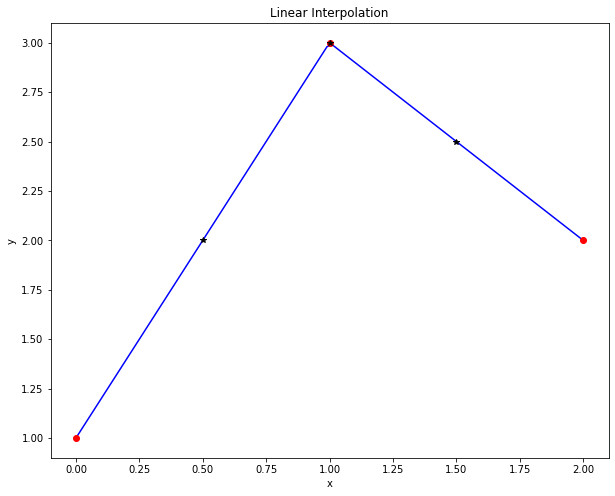

Percent Error: 0.0%


In [3]:
# Output: [2, 3, 2.5]
_x = [0, 1, 2]
_y = [1, 3, 2]
_X = [0.5, 1, 1.5]

interp_test_1 = my_lin_interp(x = _x,y = _y, X = _X)
print(interp_test_1)

# Check accuracy
f = interp1d(_x, _y, kind='linear')

x_new = np.linspace(min(_x), max(_x), 100)
y_new = f(x_new)
linear_1 = f(_X)

plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(_x, _y, 'ro')
plt.plot(_X, linear_1, 'k*')

plt.title('Linear Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Calculate Percent Error
linear_error_1 = round(
                np.mean(
                    (linear_1 - interp_test_1)/linear_1)*100,
                4)

print(f"Percent Error: {linear_error_1}%")

[ 1.   3.   5.   6.5 10. ]


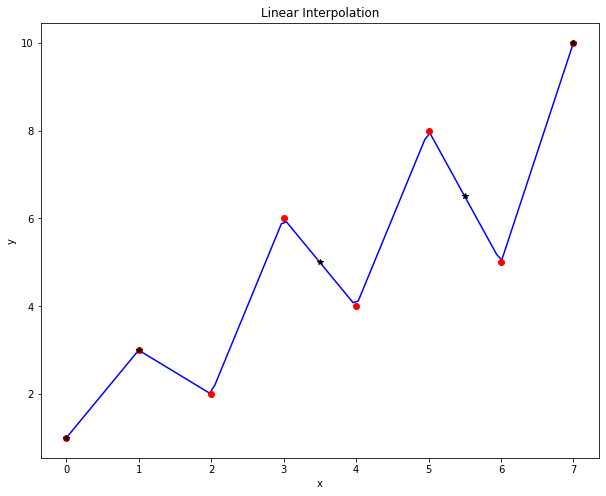

Percent Error: 0.0%


In [4]:
# Output: [1, 3, 5, 6.5, 10]
_x = [0, 1, 2, 3, 4, 5, 6, 7]
_y = [1, 3, 2, 6, 4, 8, 5, 10]
_X = [0, 1, 3.5, 5.5, 7]


interp_test_2 = my_lin_interp(x = _x,y = _y, X = _X)
print(interp_test_2)

# Check accuracy
f = interp1d(_x, _y, kind='linear')

x_new = np.linspace(min(_x), max(_x), 100)
y_new = f(x_new)
linear_2 = f(_X)

plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(_x, _y, 'ro')
plt.plot(_X, linear_2, 'k*')

plt.title('Linear Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Calculate Percent Error
linear_error_2 = round(
                np.mean(
                    (linear_2 - interp_test_2)/linear_2)*100,
                4)

print(f"Percent Error: {linear_error_2}%")

### Cubic Spline Interpolation

In [5]:
def my_cubic_spline(x: np.array, y: np.array, X: np.array) -> np.array:
    """
    Custom 1D Cubic Spline Interpolation function
    :param x: x-axis experimental data
    :param y: y-axis experimental data
    :param X: x-axis values to interpolate
    :return: Y: interpolated values for given X values
    """
    X_len = len(X)

    # Initialize Y array
    Y = np.zeros(X_len)

    # Iterate through x and y arrays
    # Get the next 3 values for each
    for i in range(0, len(x) - 2):
        x_3 = x[i:i+3]
        y_3 = y[i:i+3]

        # Left-hand side of the equation
        """
        A = np.array([
        [0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 8, 4, 2, 1],
        [3, 2, 1, 0, -3, -2, -1, 0],
        [6, 2, 0, 0, -6, -2, 0, 0],
        [0, 2, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 12, 2, 0, 0]])

        """
        x1 = x_3[0]
        x2 = x_3[1]
        x3 = x_3[2]


        A = np.array([
            [x1**3, x1**2, x1,      1, 0, 0, 0, 0],
            [0, 0, 0, 0, x2**3, x2**2, x2, 1],
            [x2**3, x2**2, x2, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, x3**3, x3**2, x3, 1],
            [3*x2**2, 2*x2, 1, 0, -3*x2**2, -2*x2, -1, 0],
            [6*x2, 2, 0, 0, -6*x2, -2, 0, 0],
            [6*x1, 2, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 6*x3, 2, 0, 0]
        ])

        # Right-hand side of the equation
        b = np.array([y_3[0], y_3[1], y_3[1], y_3[2], 0, 0, 0, 0])

        # Solve the system of equations
        p = np.dot(np.linalg.inv(A), b)

        for X_i in range(X_len):
            _X_i = X[X_i]

            # Solve for the cubic spline
            if x_3[0] < _X_i < x_3[1]:
                _Y = p[0] * (_X_i ** 3) + p[1] * (_X_i ** 2) + p[2] * _X_i + p[3]

                if Y[X_i] == 0:
                    Y[X_i] = _Y
                else:
                    Y[X_i] = (Y[X_i] + _Y)/2
            elif x_3[1] < _X_i < x_3[2]:
                _Y = p[4] * (_X_i ** 3) + p[5] * (_X_i ** 2) + p[6] * _X_i + p[7]

                if Y[X_i] == 0:
                    Y[X_i] = _Y
                else:
                    Y[X_i] = (Y[X_i] + _Y)/2

            # If X is in x
            elif _X_i == x_3[0]:
                Y[X_i] = y_3[0]
            elif _X_i == x_3[1]:
                Y[X_i] = y_3[1]
            elif _X_i == x_3[2]:
                Y[X_i] = y_3[2]

    return Y

[2.28125 3.      2.78125]


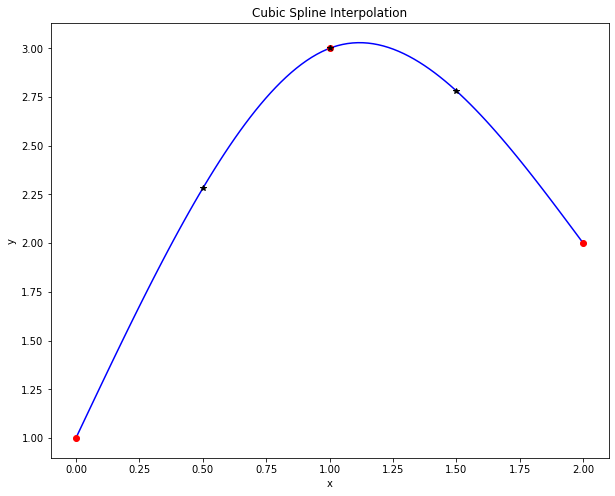

Percent Error: -0.0%


In [6]:
# Output: [1, 2.78125, 2]
_x = [0, 1, 2]
_y = [1, 3, 2]
_X = [0.5, 1, 1.5]

cubic_spline_test_1 = my_cubic_spline(x = _x,
                                      y = _y,
                                      X = _X)
print(cubic_spline_test_1)

# Check accuracy
f = CubicSpline(_x,
                _y,
                bc_type='natural')

x_new = np.linspace(min(_x), max(_x), 100)
y_new = f(x_new)
cubic_spline_1 = f(_X)

plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(_x, _y, 'ro')
plt.plot(_X, cubic_spline_test_1, 'k*')

plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Calculate Percent Error
cs_error_1 = round(
                np.mean(
                    (cubic_spline_1 - cubic_spline_test_1)/cubic_spline_1)*100,
                4)

print(f"Percent Error: {cs_error_1}%")

[ 1.          3.          4.046875    5.5703125   6.046875    5.62695312
 10.        ]


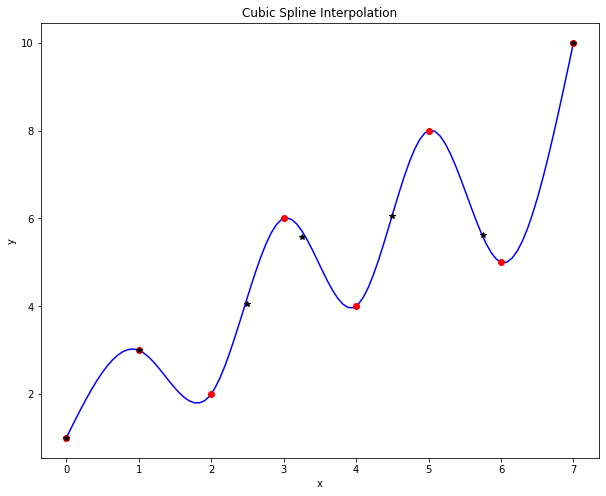

Percent Error: 0.8492%


In [7]:
# Output: [1, 3, 4.20134833, 5.72175047, 6.07329955, 5.5815012, 10]
_x = [0, 1, 2, 3, 4, 5, 6, 7]
_y = [1, 3, 2, 6, 4, 8, 5, 10]
_X = [0, 1, 2.5 , 3.25, 4.5, 5.75, 7]

cubic_spline_test_2 = my_cubic_spline(x = _x,
                                      y = _y,
                                      X = _X)
print(cubic_spline_test_2)

# Check accuracy
f = CubicSpline(_x,
                _y,
                bc_type='natural')

x_new = np.linspace(min(_x), max(_x), 100)
y_new = f(x_new)
cubic_spline_2 = f(_X)

plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(_x, _y, 'ro')
plt.plot(_X, cubic_spline_test_2, 'k*')

plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Calculate Percent Error
cs_error_2 = round(
                np.mean(
                    (cubic_spline_2 - cubic_spline_test_2)/cubic_spline_2)*100,
                4)

print(f"Percent Error: {cs_error_2}%")